In [1]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
import numpy as np
from data.data_loader import generateGauss
from utils.integral import grid
from Models.clustering import HCF
from utils.vis import plot_tree

In [3]:
bandwidth = 0.01
grid_x    = grid(bandwidth, start=-5, end=15)
mu        = np.array([0.3, 4.0, 9.1, 1.0, 5.5, 8.0, 4.8])
sig       = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
F_data    = generateGauss(mu, sig, grid_x)

In [4]:
cluster=HCF.Model(
   grid_x=grid_x,
   max_depth=7,
   distance_metric='L1',
   linkage='complete', 
   bandwidth=bandwidth
)
cluster.fit(F_data)
cluster.print_tree()

├── root (7 samples): [0, 1, 2, 3, 4, 5, 6]
│   ├── root0 (2 samples): [0, 3]
│   │   ├── root00 (1 samples): [0]
│   │   ├── root01 (1 samples): [3]
│   ├── root1 (5 samples): [1, 4, 6, 2, 5]
│   │   ├── root10 (3 samples): [1, 4, 6]
│   │   │   ├── root100 (1 samples): [1]
│   │   │   ├── root101 (2 samples): [4, 6]
│   │   │   │   ├── root1010 (1 samples): [4]
│   │   │   │   ├── root1011 (1 samples): [6]
│   │   ├── root11 (2 samples): [2, 5]
│   │   │   ├── root110 (1 samples): [2]
│   │   │   ├── root111 (1 samples): [5]


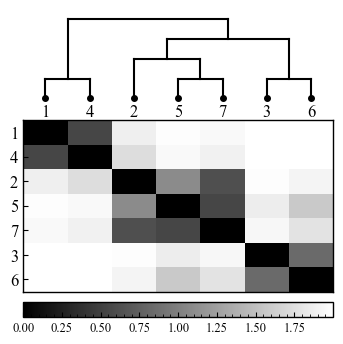

In [5]:
plot_tree(cluster.tree, cluster.dist_matrix)